### Think like a Data Scientists
- Figure out what question to ask. Write down the answer
- Read news with skeptical eye  
- See data as tool for comsumer product
- Think like a Bayesian
- Understand the machine behind your tools
- Explain like Richard Feynman
- Communicate the value of your analysis to others

### Workflow: 
    Question or problem definition.
    Acquire training and testing data.
    Wrangle, prepare, cleanse the data.
    Analyze, identify patterns, and explore the data.
    Model, predict and solve the problem.
    Visualize, report, and present the problem solving steps and final solution.
    Supply or submit the results.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data

In [139]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Questions: Who is most likely to survive?
Answers: first class, woman, children, etc

#### Questions: Does the passenger name correlates with her chance of survival?
Answers: checkout Mr, Mrs, etc

In [10]:
#df_train[['Name','Survived']]

##### Question: Is there any info can I get from ticket? 
Answer: 

##### Questions: 
Answers: 

##### Questions: 
Answers: 

##### Questions: 
Answers: 

##### Questions: 
Answers: 

### Exploratory data analysis

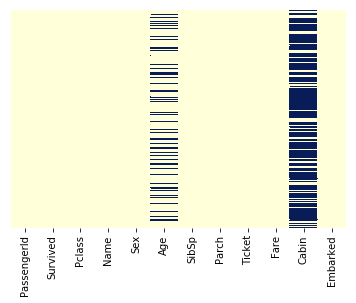

In [38]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

##### We can see there's missing data in column Age and Cabin

C:\Users\Trung Pham\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


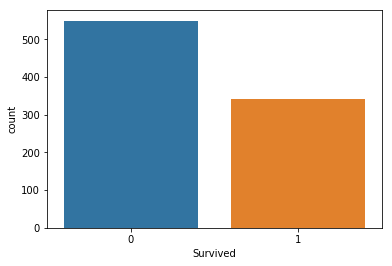

In [7]:
sns.countplot(df_train['Survived'])

C:\Users\Trung Pham\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


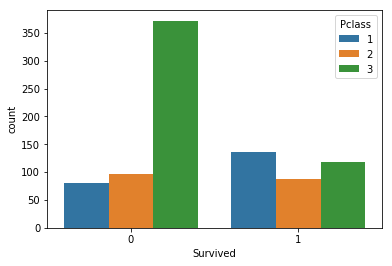

In [4]:
sns.countplot(df_train['Survived'],hue=df_train['Pclass'])
#print('\n')

C:\Users\Trung Pham\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


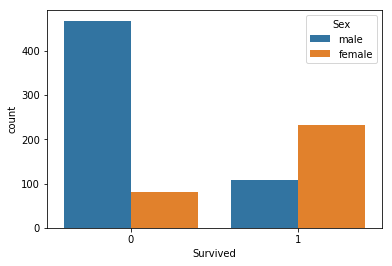

In [8]:
sns.countplot(df_train['Survived'],hue=df_train['Sex'])

### Data Cleaning

#### Fill missing data in Age

In [140]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
#df_train['Age'].head(n=10)

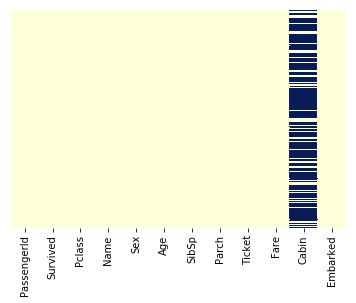

In [42]:
sns.heatmap(df_train.isnull(),yticklabels=False,xticklabels=True,cbar=False,cmap='YlGnBu')
#df_train

#### Missing data in Age is filled!

#### Now we see that the Sex column is either male or female, we want to convert to numerical value 0 or 1

In [141]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)

In [142]:
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

In [143]:
df_train.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [144]:
df_train = pd.concat([df_train,sex,embark],axis=1)

In [145]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Train the classifier

#### Get training, testing data

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test = train_test_split(df_train.drop('Survived',axis=1), df_train['Survived'], test_size=0.3, random_state=101)

#### Train the classifier

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
log = LogisticRegression()

In [150]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
prediction = log.predict(X_test)

#### Evaluation

In [152]:
from sklearn.metrics import classification_report

In [153]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.77      0.87      0.81       154
          1       0.78      0.64      0.71       114

avg / total       0.77      0.77      0.77       268

